In [ ]:
!pip3 install pandas
!pip3 install -U scikit-learn
!pip3 install seaborn

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns


In [2]:
data = pd.read_csv("fifa23.csv")

In [3]:
data = data.replace("-", "0") #replace missing values with 0
data.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [4]:
# remove columns
# "National Team Position" will be what we use to determine whether a player plays for a national team.
# if there is no "National Team Position, insert an NA.
# encode this variable
columnsToDrop = ["Positions Played", "Image Link",  "National Team Image Link"]
data.drop(columnsToDrop, inplace=True, axis=1)

<AxesSubplot:xlabel='Potential', ylabel='Value(in Euro)'>

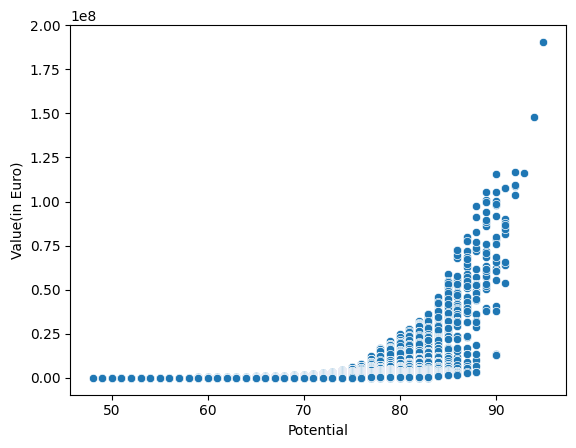

In [5]:

# plotting a scatterplot
sns.scatterplot(x="Potential",
                y="Value(in Euro)", data=data)

In [5]:
# initalize the label encoder for the Best Position
# categories
labelEncoder = preprocessing.LabelEncoder()
# labelEncoder.fit(data["Best Position"])
# print("labels: ", list(labelEncoder.classes_), labelEncoder.inverse_transform([4]))
# labelEncoder.transform(["ST", "RWB", "RM"]) #array([14, 13, 11])

In [6]:
categoricalVariables = ["Best Position", "Nationality", "Club Name", "On Loan", "Full Name", "Known As", "Club Position", "Preferred Foot", "Attacking Work Rate", "Defensive Work Rate"]
data[categoricalVariables] = data[categoricalVariables].apply(labelEncoder.fit_transform)

<AxesSubplot:xlabel='Skill Moves', ylabel='Value(in Euro)'>

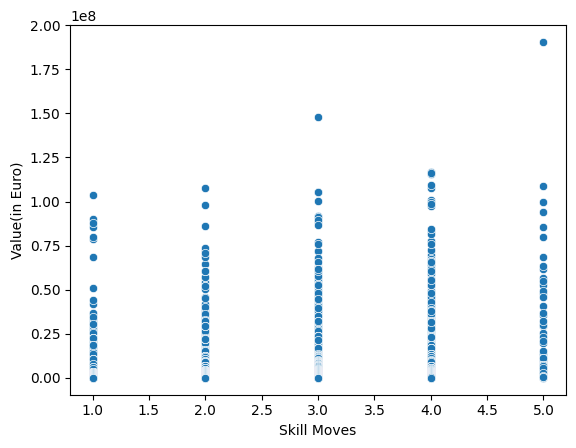

In [25]:

# plotting a scatterplot
sns.scatterplot(x="Skill Moves",
                y="Value(in Euro)", data=data)

<AxesSubplot:xlabel='Potential', ylabel='Value(in Euro)'>

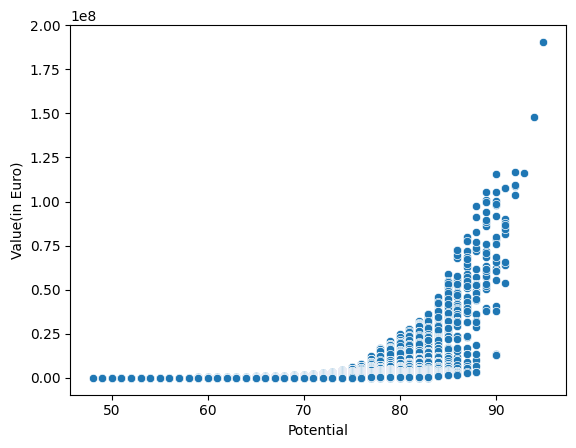

In [7]:

# plotting a scatterplot
sns.scatterplot(x="Potential",
                y="Value(in Euro)", data=data)

<AxesSubplot:xlabel='Preferred Foot', ylabel='Value(in Euro)'>

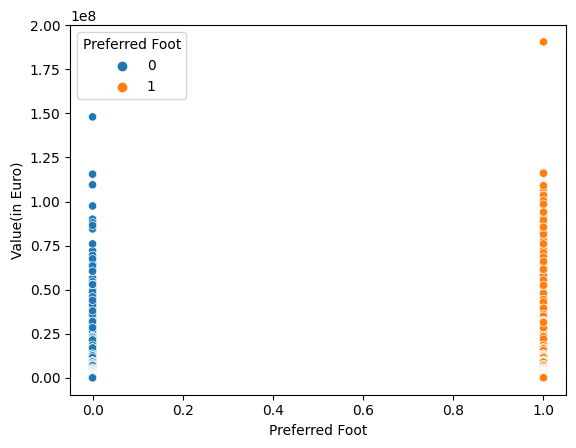

In [8]:
sns.scatterplot(x="Preferred Foot",
                y="Value(in Euro)", data=data, hue="Preferred Foot")

In [26]:
Features = pd.DataFrame(data["Potential"])
Label = data["Value(in Euro)"]

In [27]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    Features, Label, test_size=0.3, random_state=101)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
predictions = model.predict(X_test)

In [33]:
print(model.score(X_test, y_test))

0.2913829439053127


In [30]:

# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  42802721595117.95
mean_absolute_error :  3121614.0579625145


# Using a neural network

In [1]:
from sklearn.neural_network import MLPRegressor

In [2]:
clf = MLPRegressor(solver='lbfgs', 
                   alpha=1e-5,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(5, 2), random_state=24)
clf.fit(X_train, y_train)
res = clf.predict(y_test)

NameError: name 'X_train' is not defined